## Recitation 1+2: linear regression and polynomial features

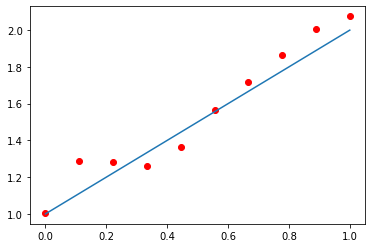

In [4]:
import numpy as np
import matplotlib.pyplot as plt



x = np.linspace(0,1,10)

beta0 = 1
beta1 = 1

beta = np.asarray([beta0, beta1])

t = beta0 + beta1*x
tnoisy = beta0 + beta1*x + np.random.normal(0,.1, len(x))

plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)

plt.show()



In [5]:


maxIter = 1000


N= len(x)


# sum_{i=1}^N (t_i - (beta0 + beta1 x_1 ))^2 

# X_tilde [x_1tilde, x2_tilde, ...]
# xi_tilde = [1, x]

X_tilde = np.hstack((np.ones((len(x),1)) , x.reshape(-1,1)))

eta = .01
currentIter = 0

learned_beta = np.random.normal(0,1,(2,))

while currentIter < maxIter:
    
    gradient_beta0 = 2/N * np.sum(tnoisy - np.dot(X_tilde,learned_beta))*(-1)
    gradient_beta1 = 2/N * np.sum(np.multiply(\
                        tnoisy - np.dot(X_tilde,learned_beta),-x))
    
    grad = np.asarray([gradient_beta0, gradient_beta1])
    
    learned_beta = learned_beta - eta*grad
    
    currentIter+=1
    


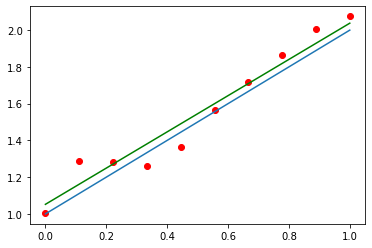

In [6]:
x_prediction = np.linspace(0,1,100)

xprediction_tilde = np.hstack((np.ones((len(x_prediction),1)), \
                    x_prediction.reshape(-1,1)))

prediction = np.dot(xprediction_tilde, learned_beta)

plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.plot(x_prediction, prediction, c='g')
plt.show()




In [33]:
a = np.ones((2,))
print(a)
np.shape(a)
b = a.reshape(-1,1)
print(b)
print(np.shape(b))

[1. 1.]
[[1.]
 [1.]]
(2, 1)


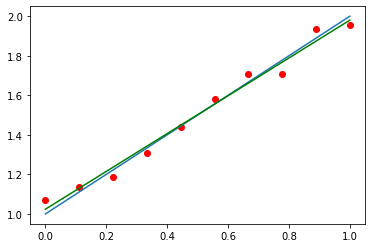

In [38]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x.reshape(-1,1), tnoisy.reshape(-1,1))

xprediction = np.linspace(0,1,100)

# estimate prediction from our model on the new set of points 
prediction = reg.predict(xprediction.reshape(-1,1))

plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.plot(xprediction,prediction, c='g')
plt.show()


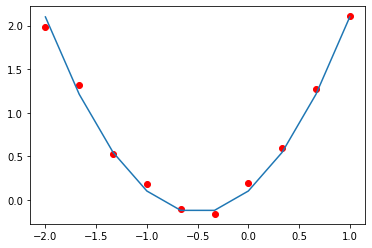

In [45]:
x = np.linspace(-2,1,10)

t = .1 + x + x**2

tnoisy = .1 + x + x**2 + np.random.normal(0,.1,(len(x),))

plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.show()


In [49]:
#1, x, x**2 = (1,x1, x2)

# h_beta = beta0 + beta1*x1 + beta2*x2 = beta0 beta1*x + beta2 * x**2

from sklearn.preprocessing import PolynomialFeatures

my_poly = PolynomialFeatures(2)

Xtilde = my_poly.fit_transform(x.reshape(-1,1))

print(Xtilde)

# each row of the Xtilde matrix is one feature vector xtilde^{(i)}


[[ 1.         -2.          4.        ]
 [ 1.         -1.66666667  2.77777778]
 [ 1.         -1.33333333  1.77777778]
 [ 1.         -1.          1.        ]
 [ 1.         -0.66666667  0.44444444]
 [ 1.         -0.33333333  0.11111111]
 [ 1.          0.          0.        ]
 [ 1.          0.33333333  0.11111111]
 [ 1.          0.66666667  0.44444444]
 [ 1.          1.          1.        ]]


In [52]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(Xtilde, tnoisy.reshape(-1,1))

xprediction = np.linspace(-2,1,100)

Xtildeprediction = my_poly.fit_transform(xprediction.reshape(-1,1))

#print(Xtildeprediction)

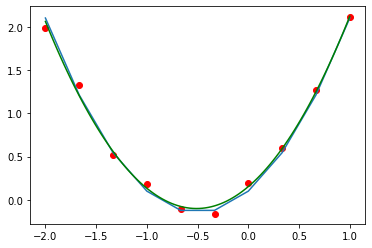

In [53]:

# estimate prediction from our model on the new set of points 
prediction = reg.predict(Xtildeprediction)

plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.plot(xprediction,prediction, c='g')
plt.show()

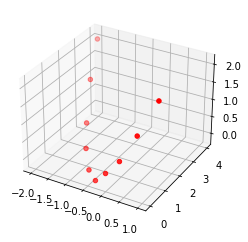

In [58]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Xtilde[:,1], Xtilde[:,2], tnoisy, c='r')
plt.show()

In [68]:
x1min = np.min(Xtilde[:,1])
x1max = np.max(Xtilde[:,1])

x2min = np.min(Xtilde[:,2])
x2max = np.max(Xtilde[:,2])

x1 = np.linspace(x1min, x1max, 50)
x2 = np.linspace(x2min, x2max, 50)

xx1, xx2 = np.meshgrid(x1,x2)

xx1vec = xx1.flatten().reshape(-1,1)
xx2vec = xx2.flatten().reshape(-1,1)


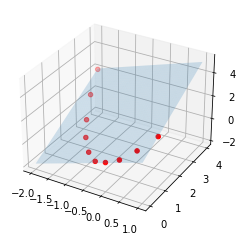

In [70]:
Xprediction = np.hstack((xx1vec, xx2vec))
Xprediction = np.hstack((np.ones((np.shape(Xprediction)[0],1)), Xprediction))

                        
                                           
prediction_target = reg.predict(Xprediction)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Xtilde[:,1], Xtilde[:,2], tnoisy, c='r')
ax.plot_surface(xx1, xx2, np.reshape(prediction_target, np.shape(xx1)),\
                alpha=.2)
plt.show()